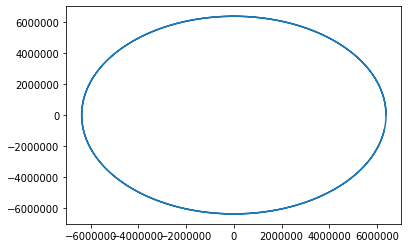

In [3]:
import numpy as np 
from matplotlib.pylab import plt

G = 6.673e-11
M = 5.97e24
R = 6371e3


def RK4(f, init, t):
    r = np.zeros((N,4)) 
    r[0,:] = init
    h = t[1] - t[0]


    for i in range(N-1):
        k1 = h*f(r[i,:],t[i])
        k2 = h*f(r[i,:]+k1/2, t[i]+h/2)
        k3 = h*f(r[i,:]+k2/2, t[i]+h/2)
        k4 = h*f(r[i,:]+k3, t[i+1])

        r[i+1,:] = r[i,:] + (k1 + 2*k2 + 2*k3 + k4)/6
    return r

init = [R, 0.0, 0.0,np.sqrt(G*M/R)] #x ,y ,vx ,vy
N = 10000



t = np.linspace(0,10000,N)
r = np.zeros((N,4))
r[0,:] = init

def F(var,t):
    
    x = var[0]
    y = var[1]
    vx = var[2]
    vy = var[3]
    
    return np.array([vx, vy, -G*x*M/R**3, -G*y*M/R**3])

h = t[1] - t[0]
for i in range(N-1):
    
    k1 = h*F(r[i,:], t[i])
    k2 = h*F(r[i,:] + k1/2, t[i]+h/2)
    k3 = h*F(r[i,:] + k2/2, t[i]+h/2)
    k4 = h*F(r[i,:] + k3, t[i+1])

    
    r[i+1,:] = r[i,:] + (k1 + 2*k2 + 2*k3 + k4)/6

plt.plot(r[:,0],r[:,1])

In [11]:
def Orbit(r):
    if r >= R:
        o_vel = np.sqrt(G*M/r)
        T = 2*np.pi*r/o_vel
        return o_vel/1000, T/3600 #Orbital Velocity in km/s and Period in hours
    else:
        print('Invalid R')
        
vel, time = Orbit(R)
        
print(f'Orbital Speed is {vel} km/s and Period is {time} hours')

Orbital Speed is 7.907586029285283 km/s and Period is 1.406180422606277 hours
